In [2]:
import torch
from torch import nn

from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor #converts images to tensors

import matplotlib.pyplot as plt


In [3]:
#getting dataset , here we are gonna use MNIST fashion datasets
train_data=datasets.FashionMNIST(
    root="data", #where to download
    train=True,#do we want training or testing dataset
    download=True,
    transform=ToTensor(),
    target_transform=None #defines how to transform how to transform labels
)

test_data= datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
#See the first training sample
image , label=train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_index=train_data.class_to_idx
class_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
image.shape , label #label doesnt have a shape, since its an integer 

(torch.Size([1, 28, 28]), 9)

color channel , height, width format here , greyscale has one color channel since its just black and white and in between 

torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

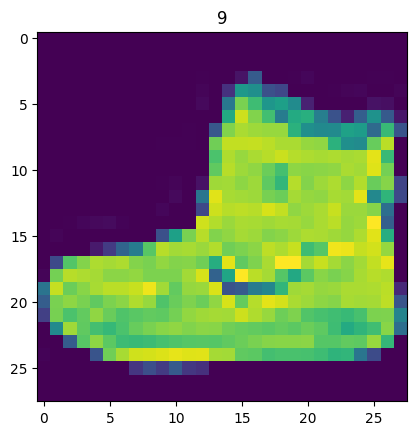

In [9]:
import matplotlib.pyplot as plt 
image, label= train_data[0]
print(image.shape)#shape error is very common
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

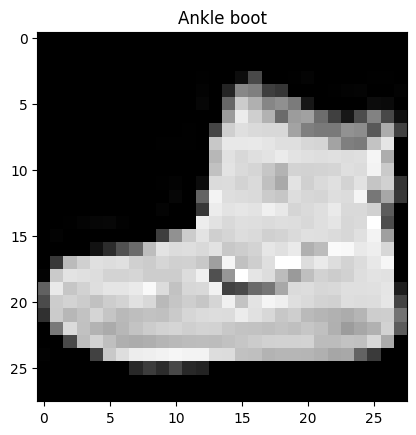

In [10]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])

11768
56614
40300
48593
34130
34611
27999
23677
1627
5062
15875
25857
6502
11156
17838
51623


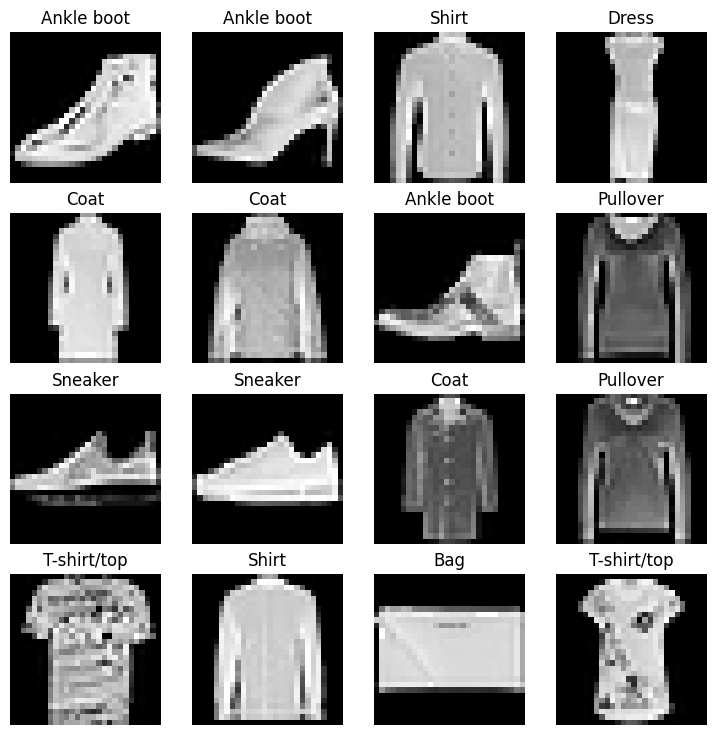

In [11]:
#random images now via imshow
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    print(random_idx)
    img ,label= train_data[random_idx]
    fig.add_subplot(rows, cols , i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [12]:
#prepare a dataloader 
#right now data is in the form of a pytorch datasets
#dataloader turns tensor into a python iterable. basically we are turning data into batches and mini batches 

from torch.utils.data import DataLoader

#setup the batch size 
BATCH_SIZE= 32

#turn data sets into iterables(batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader= DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)#order doesnt matter in the test data , its more optimized to keep the shuffle off 

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1af46746ba0>,
 <torch.utils.data.dataloader.DataLoader at 0x1af47a7e930>)

In [13]:
len(train_dataloader), len(test_dataloader) #numbers of batches created 


(1875, 313)

In [14]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))#next is used to extract the next time from an iterable, iterable means elements can be gone through in it one by one , like for loop
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
Label: 2 Label shape: torch.Size([])


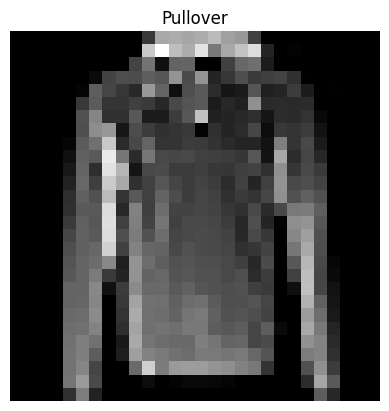

In [15]:
#show a sample 
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f"Label: {label} Label shape: {label.shape}")

=================== end of data loading part ===========================

In [16]:
#model0 , baseline mode 
#create flatter layer

flatten_model= nn.Flatten()

#Get a single sample 
x= train_features_batch[0]
x , x.shape

#Flatten the sample , does forward pass internally 
output=flatten_model(x)#performs forward pass 

print(f"shape before flattening : {x.shape} -> color channel , height , width")
print(f"shape after flatterning: {output.shape} -> color channel , height*width")

shape before flattening : torch.Size([1, 28, 28]) -> color channel , height , width
shape after flatterning: torch.Size([1, 784]) -> color channel , height*width


In [17]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0235, 0.0039, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0235, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0745, 0.5294,
        0.9020, 0.8510, 0.4118, 0.2039, 0.1412, 0.0667, 0.0000, 0.2000, 0.3216,
        0.5098, 0.8706, 0.7922, 0.3098, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2902, 0.8863,
        0.9294, 0.8667, 0.9020, 0.9961, 1.0000, 1.0000, 0.4549, 0.3451, 0.9333,
        1.0000, 0.9961, 0.9176, 0.8706, 0.9333, 0.7961, 0.3608, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000, 0.0078, 0.8431,
        0.8667, 0.7961, 0.8392, 0.7765, 0.8118, 0.8784, 0.9216, 1.0000, 1.0000,
        0.9294, 0.8784, 0.8235, 0.8118, 0.8392, 0.7961, 0.8588, 0.9255, 0.0784,
        0.0000, 0.0039, 0.0000, 0.0000, 

In [18]:
from torch import nn 
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self,x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(69)

#setup model with input parameters
model0=FashionMNISTModelV0(
    input_shape=784,#output of flatten is input here, i.e 28*28
    hidden_units=10, 
    output_shape=len(class_names)#one for every class 
).to("cpu")

model0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
#creating raw logits 
dummydat=torch.rand([1,1,28,28])#no. of batches , color channel , height , width
model0(dummydat)

tensor([[-0.0202, -0.2152,  0.5079,  0.0495, -0.3395,  0.1103,  0.4908,  0.2148,
          0.1127, -0.0960]], grad_fn=<AddmmBackward0>)

In [21]:
#loss optimizer setup 
#multiple class so cross entropy loss , optimier will be SGD 
#evaluation metric will be accuracy 

from helper_functions import accuracy_fn


#Setup loss function and optimizer 
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.1)

In [22]:
#creating a function to time the experiments 
from timeit import default_timer as timer

def print_train_time(start:float,
                     end: float,
                     device:torch.device = None):
    '''prints difference between start and end time'''
    total_time=end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [23]:

start_time= timer()
#codeblock
end_time= timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


2.8599999495781958e-05

In [24]:
len(train_dataloader)#this is number of batches created 

1875

In [25]:
#creating training loop and training model on batches 
from tqdm.auto import tqdm

#set the seed and start the timer 
torch.manual_seed(69)
train_time_start_cpu = timer()

epochs = 3

#create training and test loop 

for epoch in tqdm(range(epochs)):
    print("Epoch: {epoch}\n --------")
    #training
    train_loss=0
    #add a loop to loop through training data 
    for batch, (X,y) in enumerate(train_dataloader):#enumerate adds index to every batch
        model0.train()
        #forward pass 
        y_pred = model0(X)
        #loss calc per batch 
        loss = loss_fn(y_pred,y)
        train_loss += loss #accumalation of training loss values of every batch

        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        #print progress
        if batch%400 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)})")
        
#divide total train loss by length of train dataloader
train_loss/=len(train_dataloader)
#testing
testloss, test_acc = 0,0
model0.eval()
with torch.inference_mode():
    for X,y in test_dataloader:
        #forward pass
        test_pred = model0(X)

        #calculate loss
        testloss+= loss_fn(test_pred,y)
    
        #calculate accuracy
        test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    #calculate the test loss average 
    testloss/=len(test_data)

    #test accuracy per batch
    test_acc /= len(test_dataloader)
#print
print(f"\n Train loss: {train_loss:.4f} | test loss: {testloss:.4f}, test acc: {test_acc:.4f}")
#calc train time 
train_time_end_on_cpu=timer()
total_train_time_model0= print_train_time(start=train_time_start_cpu,
                                          end=train_time_end_on_cpu,
                                          device=next(model0.parameters()).device)


c:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: {epoch}
 --------
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)


 33%|███▎      | 1/3 [00:05<00:10,  5.35s/it]

Epoch: {epoch}
 --------
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)


 67%|██████▋   | 2/3 [00:10<00:05,  5.09s/it]

Epoch: {epoch}
 --------
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)


100%|██████████| 3/3 [00:14<00:00,  5.00s/it]



 Train loss: 0.4525 | test loss: 0.0156, test acc: 82.2584
Train time on cpu: 15.556 seconds


In [26]:
device="cpu"
#make predictions and get model0 results
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    '''returns a dictionary containing the results of model predicting on data_loader'''
    loss , acc =0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            #device agnostic code
            X,y=X.to(device),y.to(device)
            #make prediction
            y_pred=model(X)
            #accumulate the loss and acc values 
            loss+=loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        
        loss/=len(data_loader)
        acc /= len(data_loader)
    return{"model_name":model.__class__.__name__,
           "model_loss": loss.item(),
           "model_acc": acc}
model0_results=eval_model(model=model0,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)

model0_results

100%|██████████| 313/313 [00:00<00:00, 590.80it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4996737539768219,
 'model_acc': 82.25838658146965}

In [27]:
#device agnostic code 
device = "cuda" 
#model 1 : building model with non-linearity 

class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward(self,x:torch.Tensor):
        return self.layer_stack(x)
    
torch.manual_seed(69)
model1=FashionMNISTModelV1(input_shape=784,
                           hidden_units=10,
                           output_shape=10).to(device)


In [28]:
#setup loss optim and eval metric
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model1.parameters(),
                           lr=0.1)


In [29]:
def train_step(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    '''performs a training step on model that uses dataloader'''
    train_loss,train_acc=0,0
    #training
    model.train()
    #add a loop to loop through training data 
    for batch, (X,y) in enumerate(data_loader):
        X,y=X.to(device),y.to(device)
        
        #forward pass 
        y_pred_logits = model(X)
        #loss calc per batch 
        loss = loss_fn(y_pred_logits,y)
        train_loss += loss #accumalation of training loss values of every batch
        train_acc+=accuracy_fn(y_true=y,
                                y_pred=y_pred_logits.argmax(dim=1))
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step() 
        #print progress
        if batch%400 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)})")
        
    #divide total train loss and accuracy by length of train dataloader
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(f"Train loss: {train_loss:.5f}| Train acc: {train_acc:.2f}%")


def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device= device):
    #testing
    testloss, test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y=X.to(device),y.to(device)
            #forward pass
            test_pred = model(X)

            #calculate loss/acc
            testloss+= loss_fn(test_pred,y)
            test_acc+= accuracy_fn(y_true=y,
                                   y_pred=test_pred.argmax(dim=1))#logits to prediction labels
        
        #calculate the test loss average 
        testloss/=len(test_data)
        #test accuracy per batch
        test_acc /= len(test_dataloader)
        #print
        print(f"\n Train loss: {train_loss:.4f} | test loss: {testloss:.4f}, test acc: {test_acc:.4f}%")

In [30]:

#measure time
from timeit import default_timer as Timer
train_time_start_gpu=timer()

#set epochs
epochs=3


for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--")
    train_step(model=model1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model1,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)
    
train_time_end_on_gpu=timer()
total_train_time_model1=print_train_time(start=train_time_start_gpu,
                                         end=train_time_end_on_gpu,
                                         device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)
Train loss: 1.07580| Train acc: 62.59%


 33%|███▎      | 1/3 [00:07<00:15,  7.62s/it]


 Train loss: 0.4525 | test loss: 0.0284, test acc: 68.0811%
Epoch: 1
--
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)
Train loss: 0.88447| Train acc: 68.47%


 67%|██████▋   | 2/3 [00:15<00:07,  7.49s/it]


 Train loss: 0.4525 | test loss: 0.0280, test acc: 68.6801%
Epoch: 2
--
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)
Train loss: 0.85716| Train acc: 69.06%


100%|██████████| 3/3 [00:22<00:00,  7.66s/it]


 Train loss: 0.4525 | test loss: 0.0276, test acc: 68.2408%
Train time on cuda: 22.976 seconds


In [31]:
model1_results=eval_model(model=model1,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)
model1_results

100%|██████████| 313/313 [00:00<00:00, 385.46it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8816273808479309,
 'model_acc': 68.24081469648563}

In [32]:
#========================================================model2 , building a convolutional neural network=================================================

#creating a CNN, CNN is a neural network that observes and identifies patterns 

class FashionMNISTModelV2(nn.Module):
    def __init__(self,input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), #values we can set ourselves in our neural networks are called hyperparameters , these are hyperparameters of conv2d
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self,x):
        x=self.conv_block_1(x)
        #print(x.shape)
        x= self.conv_block_2(x)
        #print(x.shape)
        x=self.classifier(x)
        return x

In [33]:
image.shape


torch.Size([1, 28, 28])

In [34]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to("cuda")#because black and white images

In [35]:
torch.manual_seed(69)

#create a batch of images
images= torch.randn(size=(32,3,64,64))
test_image = image[0]

In [36]:
torch.manual_seed(69)
conv_layer = nn.Conv2d(in_channels=1,
                      out_channels=10,
                      kernel_size=(3,3),
                      stride=1,
                      padding=1)

# test_image shape: [28, 28], need to add batch and channel dimensions: [1, 1, 28, 28]
conv_output = conv_layer(test_image.unsqueeze(0).unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 28, 28])

In [37]:
#print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}\n unsqueezed: {test_image.unsqueeze(0).shape}")
#create sample maxpool
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass through conv 
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(test_image_through_conv.shape)

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after going through conv layer and max pool: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([28, 28])
 unsqueezed: torch.Size([1, 28, 28])
torch.Size([10, 28, 28])
shape after going through conv layer and max pool: torch.Size([10, 14, 14])


In [38]:
#setup a loss function and optimizer for model2
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)


In [39]:
#training and testing model2 using functions

torch.manual_seed(69)
torch.cuda.manual_seed(69)

#measure time 
from timeit import default_timer as Timer
train_time_start_model2=timer()

epochs=3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}=====\n")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)
train_time_end_model_2=timer()
total_train_time_model2=print_train_time(start=train_time_start_model2,
                                         end=train_time_end_model_2,
                                         device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0=====

Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)
Train loss: 0.60118| Train acc: 78.08%


 33%|███▎      | 1/3 [00:16<00:33, 16.57s/it]


 Train loss: 0.4525 | test loss: 0.0842, test acc: 499.8602%
Epoch: 1=====

Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)
Train loss: 0.36341| Train acc: 87.05%


 67%|██████▋   | 2/3 [00:31<00:15, 15.69s/it]


 Train loss: 0.4525 | test loss: 0.0693, test acc: 516.7232%
Epoch: 2=====

Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)
Train loss: 0.32732| Train acc: 88.31%


100%|██████████| 3/3 [00:44<00:00, 14.97s/it]


 Train loss: 0.4525 | test loss: 0.0529, test acc: 538.1290%
Train time on cuda: 44.923 seconds


In [40]:
#get model2 results
model_2_results=eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_2_results

100%|██████████| 313/313 [00:00<00:00, 357.26it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3172832131385803,
 'model_acc': 88.58825878594249}

In [41]:
#compare model results and training time 
import pandas as pd 
compare_results=pd.DataFrame([model0_results,
                              model1_results,
                              model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.499674,82.258387
1,FashionMNISTModelV1,0.881627,68.240815
2,FashionMNISTModelV2,0.317283,88.588259


In [42]:
compare_results["training time"]=[total_train_time_model0,
                                  total_train_time_model1,
                                  total_train_time_model2]

compare_results

,model_name,model_loss,model_acc,training time
0,FashionMNISTModelV0,0.499674,82.258387,15.556063
1,FashionMNISTModelV1,0.881627,68.240815,22.976024
2,FashionMNISTModelV2,0.317283,88.588259,44.922930


Text(0, 0.5, 'model')

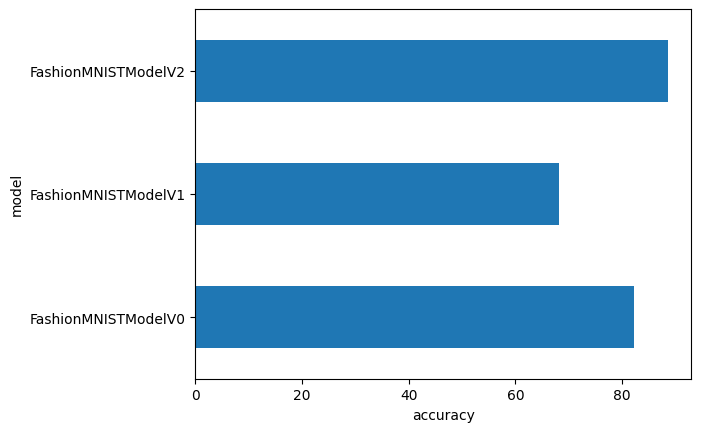

In [43]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy")
plt.ylabel("model")

In [44]:
#visualization
def make_predictions(model:torch.nn.Module,#here we deploy the model
                     data:list,
                     device:torch.device=device):
    pred_probs=[]
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #prepare a sample(add a batch dimension and pass to target device)
            sample=torch.unsqueeze(sample,dim=0).to(device)
            pred_logit= model(sample)
            
            #get pred prob
            pred_prob= torch.softmax(pred_logit.squeeze(),dim=0)

            #get pred prob off GPU for further calculation
            pred_probs.append(pred_prob.cpu())

    #stack pred probs to turn list into a tensor
    return torch.stack(pred_probs)

In [45]:
import random 
random.seed(69)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):#randomly sampling 9 samples
    test_samples.append(sample)
    test_labels.append(label)

#view the first sample shape 
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sneaker')

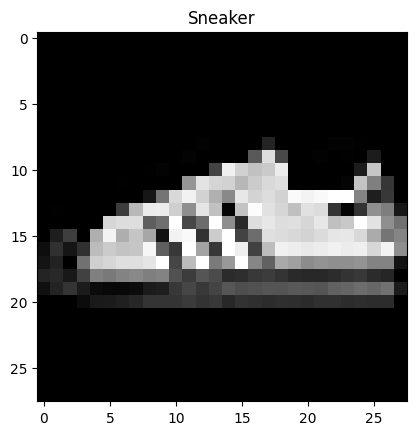

In [46]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [47]:
#make predictions 
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

#view first two prediction probabilities 
pred_probs[:2]

#convert pred probs to labels 
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 3, 2, 5, 2, 3, 7, 9, 5])

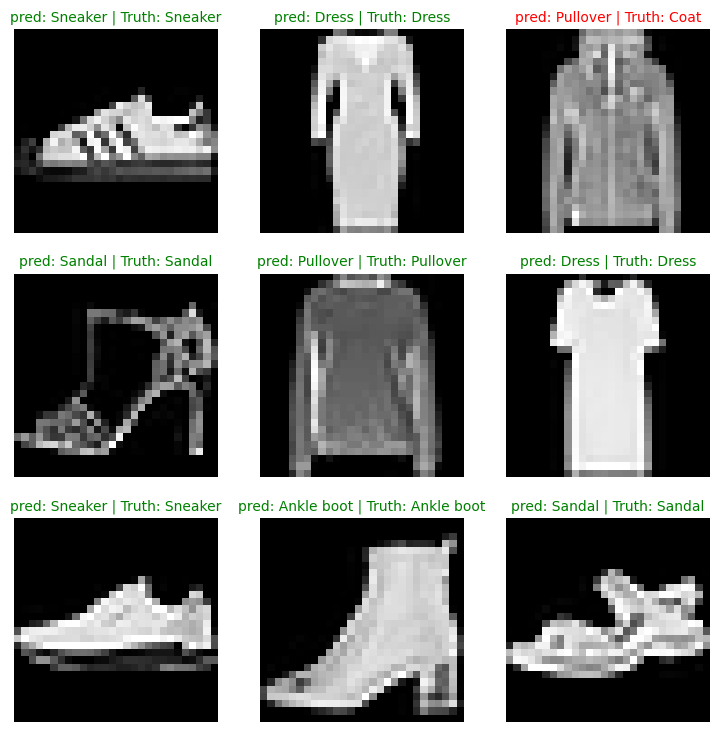

In [48]:
#plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i,sample in enumerate(test_samples):
    plt.subplot(nrows,ncols, i+1)

    #plot the target image 
    plt.imshow(sample.squeeze(),cmap="gray")

    #find the prediction 
    pred_label = class_names[pred_classes[i]]

    #get the truth label (in text form)
    truth_label= class_names[test_labels[i]]

    #create a title for the plot 
    title_text=f"pred: {pred_label} | Truth: {truth_label}"

    #check for equaliy between pred and truth and change of color of title text 
    if pred_label == truth_label:
        plt.title(title_text,fontsize=10,c="g")
    else:
        plt.title(title_text,fontsize=10,c="r")
    plt.axis(False)

In [ ]:
#make predictions with trained model 
y_preds=[]
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc="Making predictions "):
        X,y=X.to(device),y.to(device)

        y_logit=model_2(X)
        #turn logit to pred prob
        y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
        #put prediction on CPU for evaluation 
        y_preds.append(y_pred.cpu())

#concatenate list of prediction into tensor
y_pred_tensor= torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions : 100%|██████████| 313/313 [00:01<00:00, 246.51it/s]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_data.targets #just another name for labels 

tensor([9, 2, 1,  ..., 8, 1, 5])

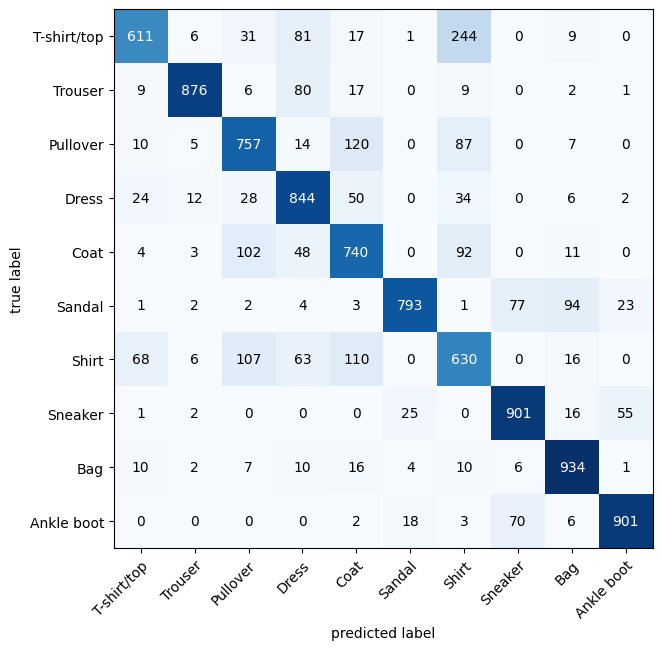

In [55]:
#confusion matrix 
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

#setup confusion instance and compare predictions to targets 
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

#plot 
fig,ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [56]:
#saving and loading best performing model 
from pathlib import Path

#create model directory path
MODEL_PATH=Path("modells")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

#create model save
MODEL_NAME= "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH
print("saving ")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

saving 


In [57]:
#create a new instance since we saved only state dict of it 
torch.manual_seed(69)

loaded_model_2= FashionMNISTModelV2(input_shape=1,#number of color channel 
                                    hidden_units=10,
                                    output_shape=len(class_names))

#load in save state dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#send model to target device 
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [59]:
#evaluate loaded model 
torch.manual_seed(69)

loaded_model_2_results= eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results , model_2_results

100%|██████████| 313/313 [00:01<00:00, 160.55it/s]


({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3172832131385803,
  'model_acc': 88.58825878594249},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3172832131385803,
  'model_acc': 88.58825878594249})